In [260]:
# Import Packages
import pulp as plp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [283]:
# Input Data
PRODUCT = range(0,8)
labor = [5	,5,	1,	4,	3.5,	4,	2,	3.5]
raw_material = [3,	4.5,	5,	5,	4.5,	2,	3.5,	3]
pollution = [25,	29,	35,	26,	17,	25,	28,	6]
profit = [53,	69,	73,	69,	51,	49,	71,	40]
min_production = [0,	30,	0,	10,	20,	50,	30,	0]
max_production = [190, 110,	140,	140,	190,	190,	110,	150]
available_labor = 1300
available_raw_material = 1000

In [284]:
# Step 1: Solving the single objective problem where only the profit is maximized 
problem = plp.LpProblem('product_mix_problem', plp.LpMaximize)
Produce = plp.LpVariable.dicts("Produce", (i for i in PRODUCT), lowBound=0, cat="Continuous")

problem += plp.lpSum(profit[i] * Produce[i] for i in PRODUCT), "Profit"
problem += plp.lpSum(labor[i] * Produce[i] for i in PRODUCT) <= available_labor, "Labor constraint"
problem += plp.lpSum(raw_material[i] * Produce[i] for i in PRODUCT) <= available_raw_material, "Raw material constraint"

for i in PRODUCT: 
    problem += Produce[i] >= min_production[i], "Min production for product " + str(i)
    problem += Produce[i] <= max_production[i], "Max production for product " + str(i)
    
problem.solve()
# print(plp.LpStatus[problem.status])
best_profit = plp.value(problem.objective)
worst_pollution = np.sum([pollution[i] * plp.value(Produce[i]) for i in PRODUCT])
best_profit_solution = [plp.value(v) for v in problem.variables()]

In [285]:
# Step 2Solving the single objective problem where only the pollution is minimized 
problem += plp.lpSum(pollution[i] * Produce[i] for i in PRODUCT), "Pollution"
problem.sense = plp.LpMinimize
problem.solve()
# print(plp.LpStatus[problem.status])
best_pollution = plp.value(problem.objective)
worst_profit = np.sum([profit[i] * plp.value(Produce[i]) for i in PRODUCT])

c:\Users\karim\AppData\Local\Programs\Python\Python310\lib\site-packages\pulp\pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [286]:
# Initialization of Step 3

minimum_profit = 9000
problem += plp.lpSum(profit[i] * Produce[i] for i in PRODUCT) >= minimum_profit, "Profit_constraint"

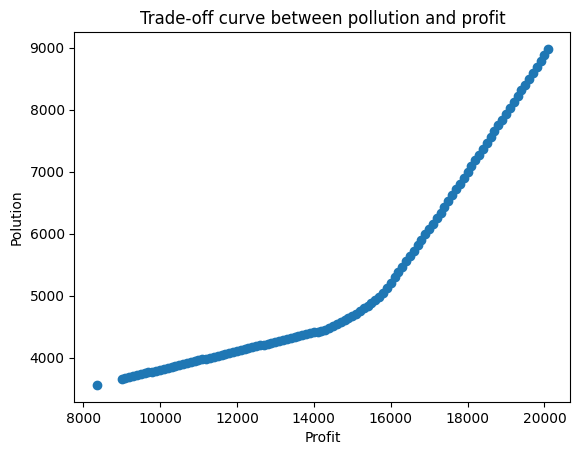

In [288]:
pareto_pollution = [best_pollution]
pareto_profit = [worst_profit]
pareto_solutions = [[plp.value(v) for v in problem.variables()]]

minimum_profit = 9000
profit_step = 100

while minimum_profit < best_profit:
    problem.constraints["Profit_constraint"].changeRHS(minimum_profit)
    problem.constraints["Profit_constraint"]
    problem.solve()
    resulting_pollution = plp.value(problem.objective)
    pareto_pollution.append(resulting_pollution)
    pareto_profit.append(np.sum([profit[i] * plp.value(Produce[i]) for i in PRODUCT]))
    pareto_solutions.append([plp.value(v) for v in problem.variables()])
    minimum_profit += profit_step
    
pareto_pollution.append(worst_pollution)
pareto_profit.append(best_profit)
pareto_solutions.append(best_profit_solution)

fig, ax = plt.subplots() # define the axis object here

plt.scatter(data=pd.DataFrame({"Profit": pareto_profit, "Pollution": pareto_pollution}), x="Profit", y="Pollution")
plt.xlabel("Profit")
plt.ylabel("Polution")
plt.title("Trade-off curve between pollution and profit")
plt.show()

In [275]:
c = dict([("X"+str(i), [pareto_solutions[j][i] for j in range(len(pareto_solutions))]) for i in range(len(PRODUCT))])
c["Profit"] = pareto_profit
c["Pollution"] = pareto_pollution
df = pd.DataFrame(c).round()
df.to_csv("result.csv")
df

,X0,X1,X2,X3,X4,X5,X6,X7,Profit,Pollution
0,0.0,30.0,0.0,10.0,20.0,165.0,110.0,4.0,8360.0,3560.0
1,0.0,30.0,0.0,10.0,20.0,50.0,30.0,16.0,9000.0,3656.0
2,0.0,30.0,0.0,10.0,20.0,50.0,30.0,41.0,10000.0,3806.0
3,0.0,30.0,0.0,10.0,20.0,50.0,30.0,66.0,11000.0,3956.0
4,0.0,30.0,0.0,10.0,20.0,50.0,30.0,91.0,12000.0,4106.0
5,0.0,30.0,0.0,10.0,20.0,50.0,30.0,116.0,13000.0,4256.0
6,0.0,30.0,0.0,10.0,20.0,50.0,30.0,141.0,14000.0,4406.0
7,0.0,30.0,0.0,10.0,33.0,50.0,30.0,150.0,15000.0,4673.0
8,0.0,30.0,0.0,10.0,20.0,50.0,59.0,139.0,16000.0,5210.0
9,0.0,30.0,0.0,10.0,20.0,50.0,100.0,92.0,17000.0,6073.0
